In [139]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [140]:
X,y = make_circles(n_samples=100 , noise=0.1,random_state = 1)

<Axes: >

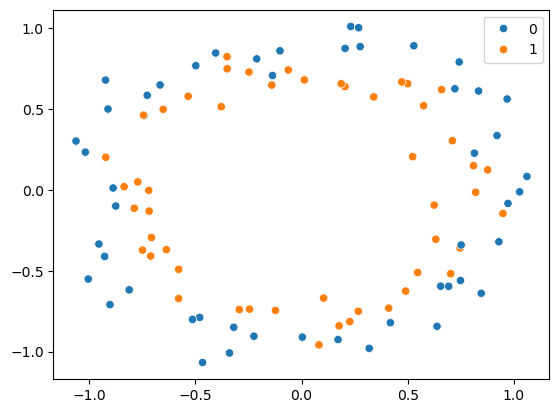

In [141]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

In [142]:
X_train,X_test , y_train , y_test = train_test_split(X,y , test_size=0.20, random_state = 2)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Charanjot Kaur\anaconda3\envs\digit_ann\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 56)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            57 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,829 (77.46 KB)

 Trainable params: 6,609 (25.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,220 (51.64 KB)

In [144]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [145]:
history = model.fit(X_train,y_train , validation_data =(X_test, y_test),epochs =1000 , verbose = 1)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5125 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5125 - loss: 0.6930 - val_accuracy: 0.4500 - val_loss: 0.6944
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5125 - loss: 0.6909 - val_accuracy: 0.4500 - val_loss: 0.6938
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5250 - loss: 0.6900 - val_accuracy: 0.4500 - val_loss: 0.6950
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 0.6893 - val_accuracy: 0.4000 - val_loss: 0.6975
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5250 - loss: 0.6884 - val_accuracy: 0.4500 - val_loss: 0.6999
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5250 - loss: 0.6875 - val_accuracy: 0.4000 - val_loss: 0.7020
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5625 - loss: 0.6870 - val_accuracy: 0.4000 - 

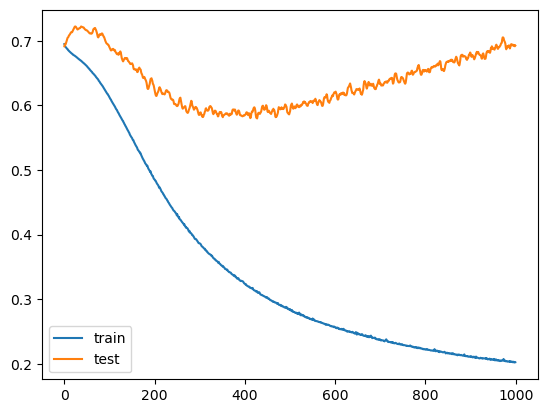

In [146]:
plt.plot(history.history['loss'] , label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step


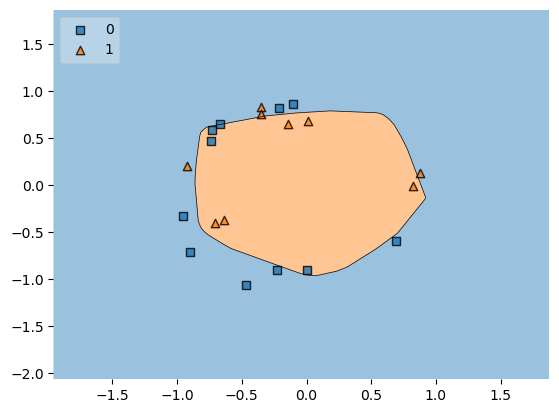

In [147]:
plot_decision_regions(X_test,y_test.ravel(),clf = model , legend = 2)
plt.show()

# Early Stopping

In [131]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [132]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [148]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.0001,
    patience = 10,
    verbose = 1,
    mode ='auto',
    baseline = None,
    restore_best_weights=True
)

In [149]:
history = model.fit(X_train , y_train , validation_data=(X_test , y_test),epochs=3500 , callbacks = callback,verbose = 1)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9250 - loss: 0.2019 - val_accuracy: 0.6500 - val_loss: 0.6943
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9250 - loss: 0.2026 - val_accuracy: 0.6500 - val_loss: 0.6960
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9250 - loss: 0.2025 - val_accuracy: 0.6500 - val_loss: 0.6953
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9250 - loss: 0.2027 - val_accuracy: 0.6500 - val_loss: 0.6922
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9250 - loss: 0.2018 - val_accuracy: 0.6500 - val_loss: 0.6916
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9250 - loss: 0.2016 - val_accuracy: 0.6500 - val_loss: 0.6908
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9250 - loss: 0.2022 - val_accuracy: 0.6500 - val_loss: 0.6881
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9250 - loss: 0.2019 - val_accuracy: 0.6500 - v

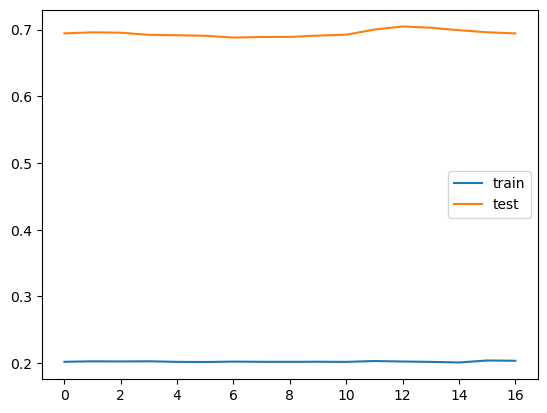

In [150]:
plt.plot(history.history['loss'] , label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step


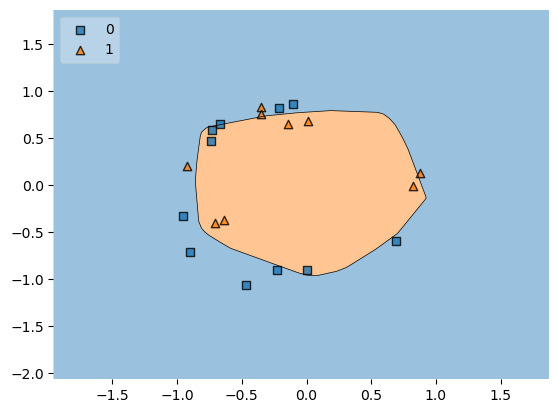

In [151]:
plot_decision_regions(X_test,y_test.ravel(),clf = model , legend = 2)
plt.show()